<a href="https://colab.research.google.com/github/maherelhachem/INSE6220/blob/main/Maherelhachem_(40222624)_NEW_Final_Project_Classification_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [7]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

In [6]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

In [14]:
#read cvs file into dataframe
df = pd.read_excel('/content/drive/MyDrive/Rice_Cammeo_Osmancik.xlsx')
df.head(25)

Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0   15231  525.578979         229.749878          85.093788      0.928882   
1   14656  494.311005         206.020065          91.730972      0.895405   
2   14634  501.122009         214.106781          87.768288      0.912118   
3   13176  458.342987         193.337387          87.448395      0.891861   
4   14688  507.166992         211.743378          89.312454      0.906691   
5   13479  477.015991         200.053055          86.650291      0.901328   
6   15757  509.281006         207.296677          98.336136      0.880323   
7   16405  526.570007         221.612518          95.436707      0.902521   
8   14534  483.640991         196.650818          95.050682      0.875429   
9   13485  471.570007         198.272644          87.727287      0.896789   
10  14930  499.924988         212.245819          90.017479      0.905606   
11  14626  496.585999         204.534134          92.974869      0.890712   
12  15926  522.739990         225.736053          91.057091      0.915033   
13  14076  479.677002         199.489151          90.709984      0.890639   
14  13500  476.915009         202.546677          85.405472      0.906755   
15  14349  496.946014         213.544022          86.160774      0.914988   
16  15209  496.565002         214.050079          91.026321      0.905073   
17  15238  496.871002         208.531784          93.828400      0.893055   
18  13509  480.466003         207.137161          83.940163      0.914211   
19  13699  480.729004         197.970917          89.949074      0.890821   
20  13921  481.993011         203.444870          88.125816      0.901313   
21  14405  488.237000         204.430130          90.626457      0.896367   
22  13377  472.960999         199.940781          86.682869      0.901133   
23  15043  498.299011         206.011703          94.766685      0.887916   
24  14590  496.171997         212.100754          88.602409      0.908568   

    Convex_Area    Extent   Class  
0         15617  0.572896  Cammeo  
1         15072  0.615436  Cammeo  
2         14954  0.693259  Cammeo  
3         13368  0.640669  Cammeo  
4         15262  0.646024  Cammeo  
5         13786  0.657897  Cammeo  
6         16150  0.589708  Cammeo  
7         16837  0.658888  Cammeo  
8         14932  0.649651  Cammeo  
9         13734  0.572320  Cammeo  
10        15248  0.624373  Cammeo  
11        15070  0.570214  Cammeo  
12        16240  0.779769  Cammeo  
13        14434  0.781219  Cammeo  
14        13800  0.717703  Cammeo  
15        14678  0.666837  Cammeo  
16        15395  0.569370  Cammeo  
17        15487  0.732314  Cammeo  
18        13732  0.595635  Cammeo  
19        14178  0.672047  Cammeo  
20        14210  0.561331  Cammeo  
21        14742  0.763786  Cammeo  
22        13685  0.794831  Cammeo  
23        15414  0.586884  Cammeo  
24        14883  0.571485  Cammeo

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


In [17]:
# to change class column into unique values 
df ['Class'].unique()
# to count the class variables 
df ['Class'][df['Class']=='Cammeo'].value_counts()
df ['Class'][df ['Class']=='Osmancik'].value_counts()

labels, levels = pd.factorize(df['Class'])
df['Class']= labels

In [18]:
# to convert string to numeric     


for i in range(0, len(df.columns)):
	df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='ignore')

In [19]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [20]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

In [21]:
sns.pairplot(df, hue='Class')
plt.show()

In [22]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [23]:
X = df.drop(columns=['Class'])
X.head(10)

Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231  525.578979         229.749878          85.093788      0.928882   
1  14656  494.311005         206.020065          91.730972      0.895405   
2  14634  501.122009         214.106781          87.768288      0.912118   
3  13176  458.342987         193.337387          87.448395      0.891861   
4  14688  507.166992         211.743378          89.312454      0.906691   
5  13479  477.015991         200.053055          86.650291      0.901328   
6  15757  509.281006         207.296677          98.336136      0.880323   
7  16405  526.570007         221.612518          95.436707      0.902521   
8  14534  483.640991         196.650818          95.050682      0.875429   
9  13485  471.570007         198.272644          87.727287      0.896789   

   Convex_Area    Extent  
0        15617  0.572896  
1        15072  0.615436  
2        14954  0.693259  
3        13368  0.640669  
4        15262  0.646024  
5        13786  0.657897  
6        16150  0.589708  
7        16837  0.658888  
8        14932  0.649651  
9        13734  0.572320

In [24]:
X.describe().transpose()

count          mean          std          min  \
Area               3810.0  12667.727559  1732.367706  7551.000000   
Perimeter          3810.0    454.239180    35.597081   359.100006   
Major_Axis_Length  3810.0    188.776222    17.448679   145.264465   
Minor_Axis_Length  3810.0     86.313750     5.729817    59.532406   
Eccentricity       3810.0      0.886871     0.020818     0.777233   
Convex_Area        3810.0  12952.496850  1776.972042  7723.000000   
Extent             3810.0      0.661934     0.077239     0.497413   

                            25%           50%           75%           max  
Area               11370.500000  12421.500000  13950.000000  18913.000000  
Perimeter            426.144753    448.852493    483.683746    548.445984  
Major_Axis_Length    174.353855    185.810059    203.550438    239.010498  
Minor_Axis_Length     82.731695     86.434647     90.143677    107.542450  
Eccentricity           0.872402      0.889050      0.902588      0.948007  
Convex_Area        11626.250000  12706.500000  14284.000000  19099.000000  
Extent                 0.598862      0.645361      0.726562      0.861050

**Standardize the Data**

In [25]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  1.479830   2.004354           2.348547          -0.212943      2.018337   
1  1.147870   1.125853           0.988390           0.945568      0.410018   
2  1.135169   1.317214           1.451908           0.253887      1.212956   
3  0.293436   0.115300           0.261439           0.198051      0.239751   
4  1.166345   1.487053           1.316442           0.523419      0.952221   
5  0.468364   0.639935           0.646371           0.058743      0.694590   
6  1.783500   1.546448           1.061564           2.098490     -0.314536   
7  2.157604   2.032198           1.882126           1.592399      0.751870   
8  1.077437   0.826070           0.451360           1.525019     -0.549700   
9  0.471828   0.486925           0.544320           0.246731      0.476524   

   Convex_Area    Extent  
0     1.499659 -1.152921  
1     1.192918 -0.602079  
2     1.126504  0.405611  
3     0.233857 -0.275351  
4     1.299855 -0.206013  
5     0.469120 -0.052270  
6     1.799647 -0.935222  
7     2.186311 -0.039438  
8     1.114122 -0.159043  
9     0.439853 -1.160375

In [26]:
X.describe().transpose()

count          mean       std       min       25%  \
Area               3810.0 -1.644645e-16  1.000131 -2.953991 -0.748916   
Perimeter          3810.0 -1.985230e-15  1.000131 -2.673019 -0.789338   
Major_Axis_Length  3810.0  2.742630e-16  1.000131 -2.494027 -0.826668   
Minor_Axis_Length  3810.0 -2.280182e-16  1.000131 -4.674645 -0.625243   
Eccentricity       3810.0  4.353473e-16  1.000131 -5.267280 -0.695126   
Convex_Area        3810.0  3.412260e-16  1.000131 -2.943312 -0.746450   
Extent             3810.0 -4.013704e-16  1.000131 -2.130313 -0.816689   

                        50%       75%       max  
Area              -0.142152  0.740282  3.605523  
Perimeter         -0.151344  0.827271  2.646823  
Major_Axis_Length -0.170016  0.846835  2.879351  
Minor_Axis_Length  0.021102  0.668508  3.705439  
Eccentricity       0.104713  0.755107  2.937147  
Convex_Area       -0.138454  0.749408  3.459430  
Extent            -0.214592  0.836834  2.578260

**Observations and variables**

In [27]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

In [28]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

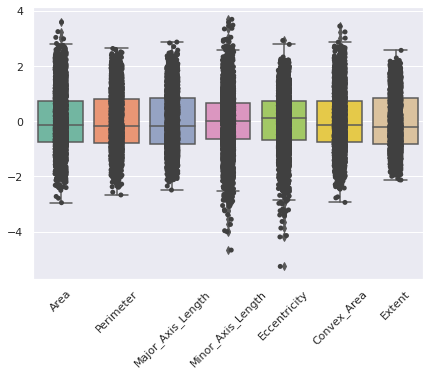

In [29]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

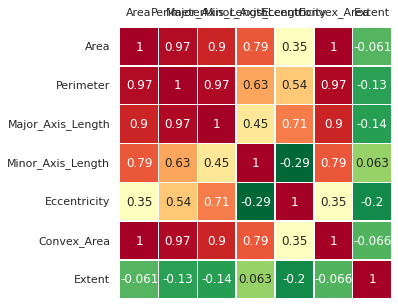

In [30]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

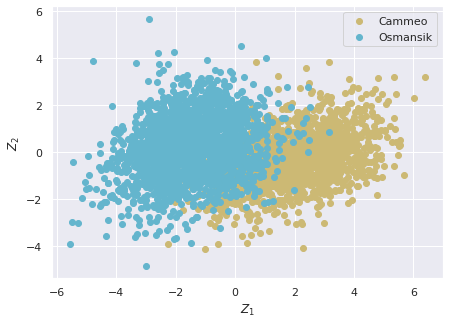

In [31]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Cameo)->0,  2(Osmansik)->1,
idx_Cammeo = np.where(y == 0)
idx_Osmansik = np.where(y == 1)


plt. figure()
plt.scatter(Z[idx_Cammeo,0], Z[idx_Cammeo,1], c='y', label='Cammeo')
plt.scatter(Z[idx_Osmansik,0], Z[idx_Osmansik,1], c='c', label='Osmansik')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

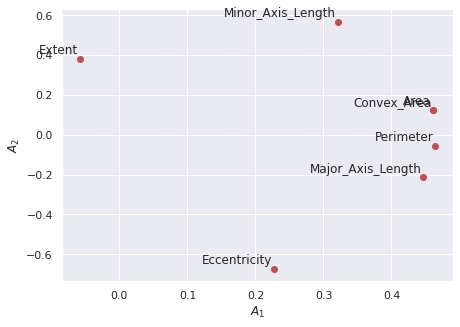

In [32]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


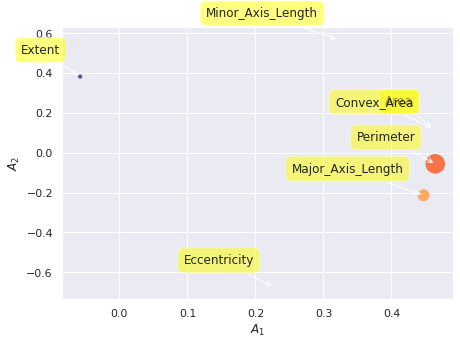

In [33]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

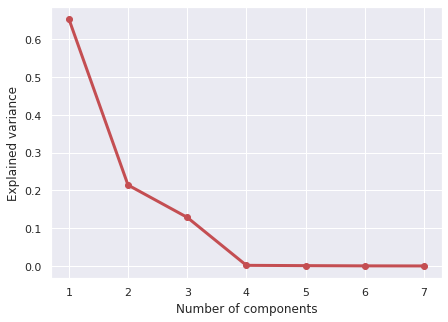

In [34]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

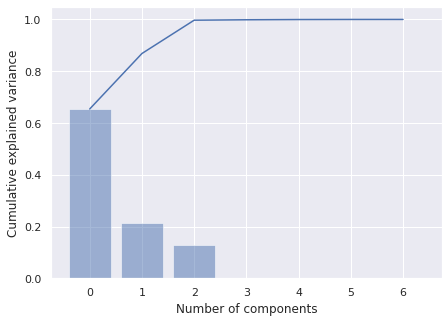

In [35]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

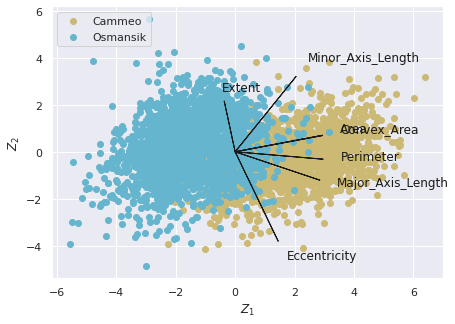

In [36]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Cammeo,0], Z[idx_Cammeo,1], c='y', label='Cammeo')
plt.scatter(Z[idx_Osmansik,0], Z[idx_Osmansik,1], c='c', label='Osmansik')
plt.legend(loc='upper left')

##**Using PCA Library**

In [37]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=745cc86938fc7c0f6dd28c29b7dd5504f2a5b06d3582bac6c84e12832e954ae8
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [38]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [39]:
out['PC']

PC1       PC2       PC3
0     3.812628 -2.165331 -0.117799
1     2.477158  0.045296 -0.516550
2     2.638556 -0.621615  0.861905
3     0.547865 -0.151403 -0.197135
4     2.814031 -0.482463  0.148042
...        ...       ...       ...
3805 -1.932582  0.874290 -0.211478
3806 -1.813787  1.960336 -0.473423
3807 -0.436684  0.103594 -0.561260
3808 -3.587933 -0.375702 -0.105979
3809 -2.556088  3.361237  0.427906

[3810 rows x 3 columns]

**Scatter plot**

[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff6b4636a50>)

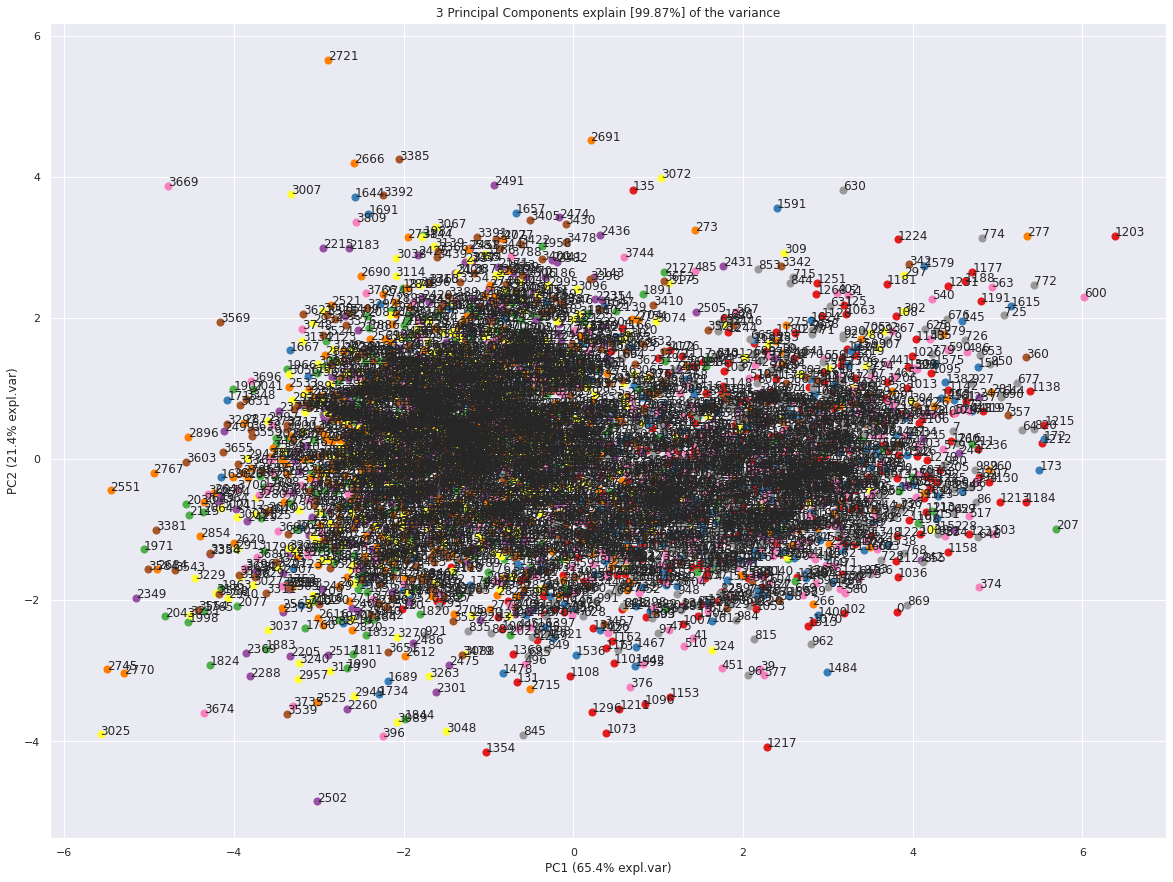

In [40]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [41]:
A = out['loadings'].T

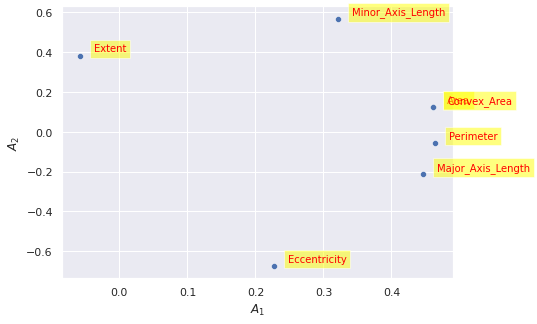

In [42]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

In [43]:
print(f'Eigenvectors:\n{A}')
print(f'Eigenvalues:\n{Lambda}')

Eigenvectors:
                        PC1       PC2       PC3
Area               0.461252  0.124377 -0.012611
Perimeter          0.464408 -0.055751  0.028372
Major_Axis_Length  0.447076 -0.213456  0.121555
Minor_Axis_Length  0.321752  0.567105 -0.212716
Eccentricity       0.227329 -0.673152  0.297985
Convex_Area        0.461694  0.122535 -0.016879
Extent            -0.057716  0.382232  0.921918
Eigenvalues:
[4.58018141e+00 1.50015241e+00 9.01041899e-01 1.17588976e-02
 6.21828712e-03 2.05320303e-03 4.31650877e-04]


**Scree Plot**

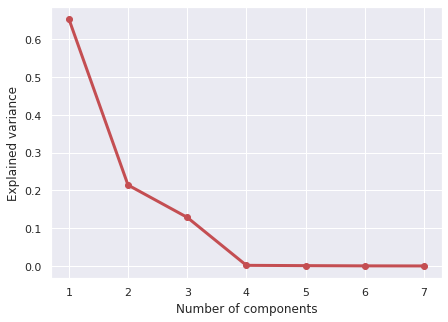

In [44]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

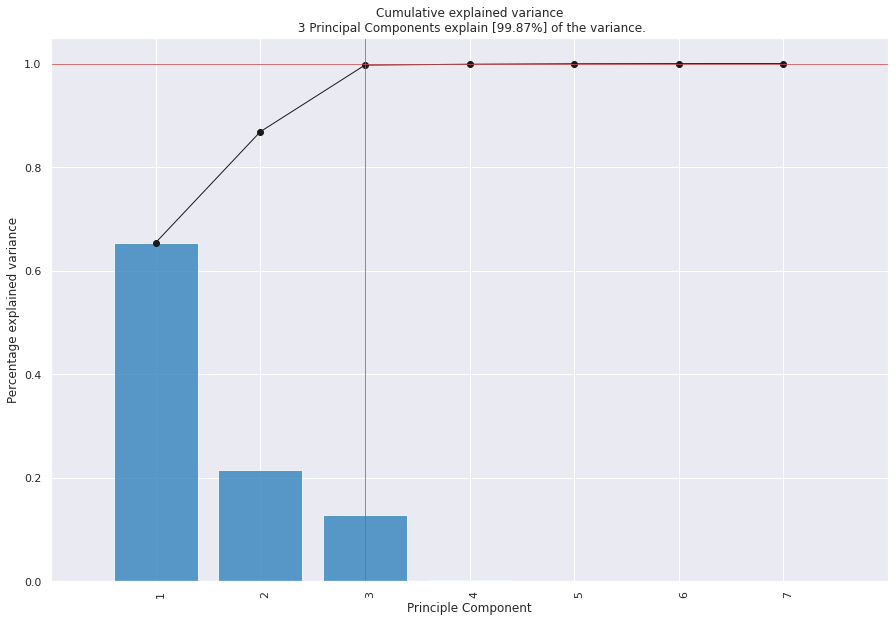

<Figure size 504x360 with 0 Axes>

In [45]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


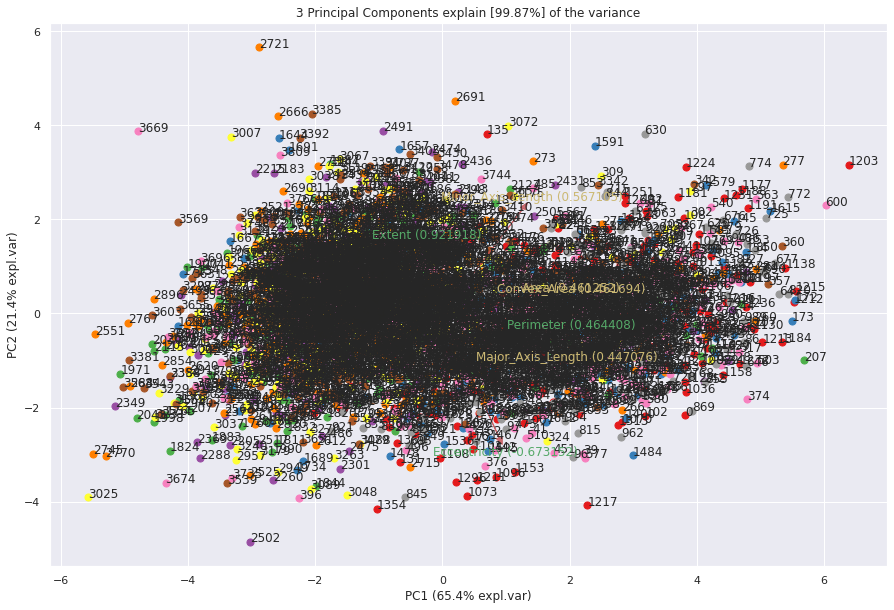

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff6acdc9a50>)

In [46]:
model.biplot(label=True, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


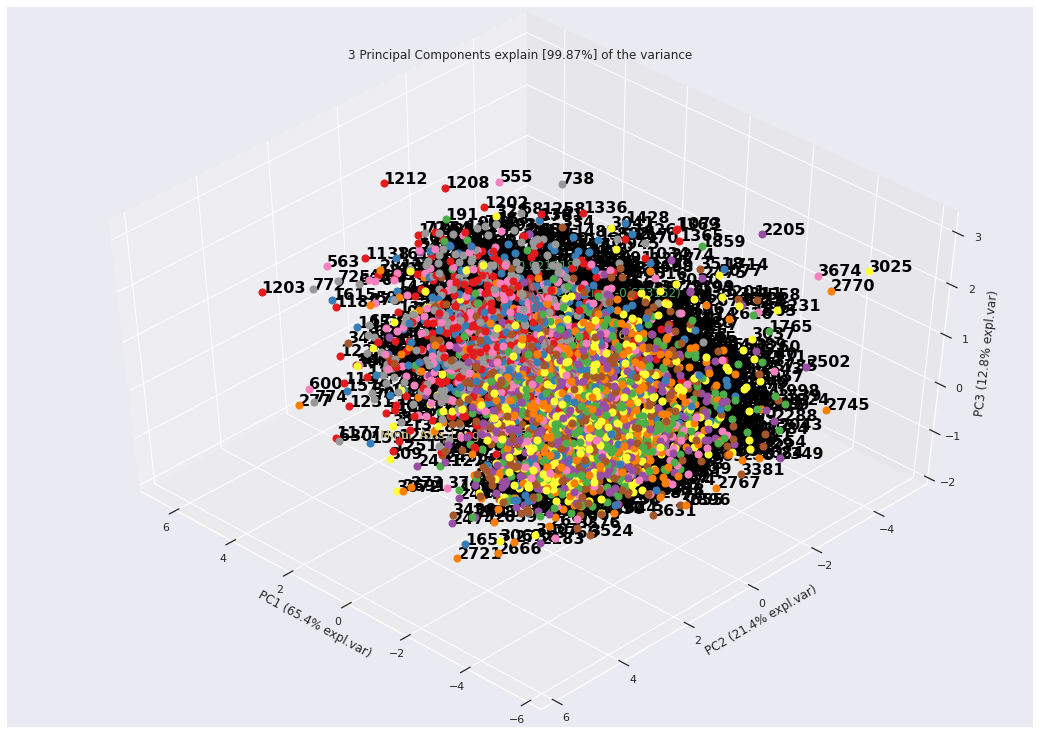

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7ff6aa22bc10>)

In [47]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [48]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [49]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3429, 8)
Unseen Data For Predictions: (381, 8)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [50]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             Class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (3429, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (2400, 6)
12                    Transformed Test Set         (1029, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              8891
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [51]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.9325  0.9789  0.9425  0.9391   
ridge                    Ridge Classifier    0.9304  0.0000  0.9492  0.9301   
lda          Linear Discriminant Analysis    0.9304  0.9788  0.9529  0.9271   
qda       Quadratic Discriminant Analysis    0.9283  0.9740  0.9278  0.9450   
gbc          Gradient Boosting Classifier    0.9217  0.9745  0.9367  0.9266   
rf               Random Forest Classifier    0.9208  0.9719  0.9330  0.9280   
et                 Extra Trees Classifier    0.9188  0.9713  0.9278  0.9292   
ada                  Ada Boost Classifier    0.9179  0.9702  0.9322  0.9243   
nb                            Naive Bayes    0.9138  0.9716  0.9249  0.9241   
lightgbm  Light Gradient Boosting Machine    0.9100  0.9717  0.9264  0.9167   
knn                K Neighbors Classifier    0.9054  0.9470  0.9249  0.9102   
dt               Decision Tree Classifier    0.8842  0.8813  0.9028  0.8945   
svm                   SVM - Linear Kernel    0.6467  0.0000  0.6875  0.7926   
dummy                    Dummy Classifier    0.5658  0.5000  1.0000  0.5658   

              F1   Kappa     MCC  TT (Sec)  
lr        0.9405  0.8625  0.8633     0.339  
ridge     0.9392  0.8579  0.8591     0.014  
lda       0.9394  0.8577  0.8593     0.016  
qda       0.9361  0.8545  0.8554     0.016  
gbc       0.9312  0.8402  0.8413     0.391  
rf        0.9302  0.8387  0.8394     0.632  
et        0.9282  0.8346  0.8354     0.514  
ada       0.9279  0.8326  0.8334     0.171  
nb        0.9240  0.8243  0.8255     0.016  
lightgbm  0.9210  0.8164  0.8177     0.126  
knn       0.9171  0.8070  0.8081     0.122  
dt        0.8980  0.7639  0.7653     0.022  
svm       0.6117  0.2807  0.3276     0.025  
dummy     0.7227  0.0000  0.0000     0.013

In [52]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [53]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8750  0.8648  0.9412  0.8533  0.8951  0.7414  0.7468
1       0.8625  0.8561  0.9044  0.8601  0.8817  0.7178  0.7191
2       0.9000  0.8937  0.9412  0.8889  0.9143  0.7945  0.7964
3       0.9000  0.9016  0.8897  0.9308  0.9098  0.7978  0.7988
4       0.9000  0.8982  0.9118  0.9118  0.9118  0.7964  0.7964
5       0.8583  0.8614  0.8382  0.9048  0.8702  0.7148  0.7173
6       0.9042  0.9019  0.9191  0.9124  0.9158  0.8046  0.8047
7       0.8833  0.8824  0.8897  0.9030  0.8963  0.7630  0.7631
8       0.8917  0.8868  0.9259  0.8865  0.9058  0.7785  0.7795
9       0.8667  0.8667  0.8667  0.8931  0.8797  0.7302  0.7307
Mean    0.8842  0.8813  0.9028  0.8945  0.8980  0.7639  0.7653
SD      0.0165  0.0168  0.0311  0.0225  0.0153  0.0335  0.0329

In [54]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [55]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9208  0.9132  0.9706  0.8980  0.9329  0.8368  0.8405
1       0.9375  0.9347  0.9559  0.9353  0.9455  0.8723  0.8726
2       0.9125  0.9070  0.9485  0.9021  0.9247  0.8204  0.8219
3       0.9583  0.9610  0.9412  0.9846  0.9624  0.9157  0.9169
4       0.9125  0.9104  0.9265  0.9197  0.9231  0.8216  0.8217
5       0.9208  0.9177  0.9412  0.9209  0.9309  0.8383  0.8385
6       0.9333  0.9276  0.9706  0.9167  0.9429  0.8630  0.8650
7       0.9208  0.9211  0.9191  0.9398  0.9294  0.8393  0.8396
8       0.9208  0.9190  0.9333  0.9265  0.9299  0.8390  0.8390
9       0.9292  0.9275  0.9407  0.9338  0.9373  0.8559  0.8560
Mean    0.9267  0.9239  0.9448  0.9277  0.9359  0.8502  0.8512
SD      0.0131  0.0147  0.0162  0.0229  0.0112  0.0269  0.0270

In [56]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [87]:
!pip install statsmodels --upgrade

How to analyze model performance using various plots

In [58]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [89]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9125  0.9599  0.9412  0.9078  0.9242  0.8208  0.8216
1       0.9250  0.9649  0.9485  0.9214  0.9348  0.8466  0.8471
2       0.9208  0.9642  0.9559  0.9091  0.9319  0.8375  0.8390
3       0.9333  0.9641  0.9044  0.9762  0.9389  0.8658  0.8688
4       0.9083  0.9505  0.9191  0.9191  0.9191  0.8133  0.8133
5       0.8917  0.9568  0.9118  0.8986  0.9051  0.7789  0.7790
6       0.9458  0.9656  0.9559  0.9489  0.9524  0.8896  0.8896
7       0.9083  0.9538  0.8971  0.9385  0.9173  0.8146  0.8157
8       0.9250  0.9510  0.9259  0.9398  0.9328  0.8479  0.8481
9       0.9375  0.9520  0.9333  0.9545  0.9438  0.8734  0.8737
Mean    0.9208  0.9583  0.9293  0.9314  0.9300  0.8389  0.8396
SD      0.0153  0.0059  0.0201  0.0231  0.0132  0.0313  0.0315

**Tune K Neighbors Model**

In [90]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9333  0.9797  0.9632  0.9225  0.9424  0.8633  0.8645
1       0.9333  0.9797  0.9485  0.9348  0.9416  0.8639  0.8641
2       0.9083  0.9738  0.9485  0.8958  0.9214  0.8116  0.8136
3       0.9458  0.9886  0.9191  0.9843  0.9506  0.8908  0.8934
4       0.9125  0.9760  0.9338  0.9137  0.9236  0.8212  0.8215
5       0.9333  0.9782  0.9338  0.9478  0.9407  0.8646  0.8647
6       0.9417  0.9744  0.9485  0.9485  0.9485  0.8812  0.8812
7       0.9250  0.9654  0.9191  0.9470  0.9328  0.8480  0.8485
8       0.9250  0.9739  0.9333  0.9333  0.9333  0.8476  0.8476
9       0.9292  0.9752  0.9333  0.9403  0.9368  0.8562  0.8563
Mean    0.9288  0.9765  0.9381  0.9368  0.9372  0.8549  0.8555
SD      0.0111  0.0056  0.0133  0.0225  0.0091  0.0231  0.0232

**Evaluate K Neighbors Model**

In [91]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [62]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  0.9799  0.9779  0.9172  0.9466  0.8714  0.8740
1       0.9458  0.9828  0.9706  0.9362  0.9531  0.8891  0.8899
2       0.9208  0.9757  0.9559  0.9091  0.9319  0.8375  0.8390
3       0.9542  0.9881  0.9338  0.9845  0.9585  0.9074  0.9090
4       0.9208  0.9796  0.9265  0.9333  0.9299  0.8390  0.8390
5       0.9292  0.9780  0.9265  0.9474  0.9368  0.8563  0.8565
6       0.9333  0.9782  0.9485  0.9348  0.9416  0.8639  0.8641
7       0.9375  0.9708  0.9191  0.9690  0.9434  0.8737  0.8753
8       0.9208  0.9766  0.9333  0.9265  0.9299  0.8390  0.8390
9       0.9250  0.9790  0.9333  0.9333  0.9333  0.8476  0.8476
Mean    0.9325  0.9789  0.9425  0.9391  0.9405  0.8625  0.8633
SD      0.0108  0.0043  0.0189  0.0216  0.0094  0.0222  0.0226

**Tune Logistic Regression Model**

In [92]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9333  0.9799  0.9632  0.9225  0.9424  0.8633  0.8645
1       0.9292  0.9825  0.9412  0.9343  0.9377  0.8556  0.8556
2       0.9167  0.9740  0.9559  0.9028  0.9286  0.8288  0.8307
3       0.9542  0.9873  0.9338  0.9845  0.9585  0.9074  0.9090
4       0.9042  0.9780  0.9118  0.9185  0.9151  0.8051  0.8051
5       0.9292  0.9779  0.9338  0.9407  0.9373  0.8559  0.8560
6       0.9458  0.9777  0.9632  0.9424  0.9527  0.8893  0.8896
7       0.9292  0.9708  0.9191  0.9542  0.9363  0.8566  0.8573
8       0.9208  0.9769  0.9333  0.9265  0.9299  0.8390  0.8390
9       0.9292  0.9783  0.9333  0.9403  0.9368  0.8562  0.8563
Mean    0.9292  0.9783  0.9389  0.9367  0.9375  0.8557  0.8563
SD      0.0133  0.0042  0.0165  0.0211  0.0116  0.0273  0.0274

**Evaluate Logistic Regression Model**

In [93]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [94]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9292  0.9585  0.9706  0.9103  0.9395  0.8543  0.8568
1       0.9125  0.9792  0.9265  0.9197  0.9231  0.8216  0.8217
2       0.9167  0.9686  0.9632  0.8973  0.9291  0.8284  0.8314
3       0.9375  0.9840  0.9118  0.9764  0.9430  0.8740  0.8765
4       0.8958  0.9664  0.9044  0.9111  0.9077  0.7881  0.7882
5       0.8958  0.9661  0.9044  0.9111  0.9077  0.7881  0.7882
6       0.9375  0.9729  0.9412  0.9481  0.9446  0.8729  0.8729
7       0.9042  0.9607  0.8971  0.9313  0.9139  0.8060  0.8067
8       0.9125  0.9633  0.9185  0.9254  0.9219  0.8224  0.8224
9       0.9208  0.9706  0.9185  0.9394  0.9288  0.8397  0.8399
Mean    0.9162  0.9690  0.9256  0.9270  0.9259  0.8295  0.8305
SD      0.0145  0.0076  0.0238  0.0219  0.0129  0.0294  0.0300

**Tune Random Forest Model**

In [95]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9250  0.9568  0.9632  0.9097  0.9357  0.8459  0.8479
1       0.9292  0.9803  0.9338  0.9407  0.9373  0.8559  0.8560
2       0.9208  0.9792  0.9632  0.9034  0.9324  0.8371  0.8396
3       0.9500  0.9821  0.9265  0.9844  0.9545  0.8991  0.9011
4       0.9208  0.9716  0.9412  0.9209  0.9309  0.8383  0.8385
5       0.9167  0.9733  0.8971  0.9531  0.9242  0.8318  0.8337
6       0.9292  0.9655  0.9338  0.9407  0.9373  0.8559  0.8560
7       0.9292  0.9509  0.9191  0.9542  0.9363  0.8566  0.8573
8       0.9042  0.9585  0.9037  0.9242  0.9139  0.8059  0.8062
9       0.9292  0.9642  0.9259  0.9470  0.9363  0.8565  0.8568
Mean    0.9254  0.9682  0.9308  0.9378  0.9339  0.8483  0.8493
SD      0.0111  0.0102  0.0207  0.0228  0.0099  0.0227  0.0228

**Evaluate Random Forest Model**

In [96]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [97]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9333  0.9799  0.9632  0.9225  0.9424  0.8633  0.8645
1       0.9292  0.9825  0.9412  0.9343  0.9377  0.8556  0.8556
2       0.9167  0.9740  0.9559  0.9028  0.9286  0.8288  0.8307
3       0.9542  0.9873  0.9338  0.9845  0.9585  0.9074  0.9090
4       0.9042  0.9780  0.9118  0.9185  0.9151  0.8051  0.8051
5       0.9292  0.9779  0.9338  0.9407  0.9373  0.8559  0.8560
6       0.9458  0.9777  0.9632  0.9424  0.9527  0.8893  0.8896
7       0.9292  0.9708  0.9191  0.9542  0.9363  0.8566  0.8573
8       0.9208  0.9769  0.9333  0.9265  0.9299  0.8390  0.8390
9       0.9292  0.9783  0.9333  0.9403  0.9368  0.8562  0.8563
Mean    0.9292  0.9783  0.9389  0.9367  0.9375  0.8557  0.8563
SD      0.0133  0.0042  0.0165  0.0211  0.0116  0.0273  0.0274

In [69]:
tuned_best_model

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [86]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [71]:
clf_pca = setup(data=data, target='Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             Class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (3429, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (2400, 3)
12                    Transformed Test Set         (1029, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              3762
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [72]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.9283  0.9782  0.9367  0.9371   
ridge                    Ridge Classifier    0.9279  0.0000  0.9367  0.9365   
lda          Linear Discriminant Analysis    0.9279  0.9782  0.9367  0.9365   
qda       Quadratic Discriminant Analysis    0.9242  0.9775  0.9293  0.9367   
gbc          Gradient Boosting Classifier    0.9233  0.9758  0.9322  0.9329   
knn                K Neighbors Classifier    0.9208  0.9583  0.9293  0.9314   
svm                   SVM - Linear Kernel    0.9196  0.0000  0.9087  0.9487   
et                 Extra Trees Classifier    0.9187  0.9713  0.9264  0.9305   
nb                            Naive Bayes    0.9183  0.9755  0.9308  0.9265   
lightgbm  Light Gradient Boosting Machine    0.9167  0.9720  0.9278  0.9257   
rf               Random Forest Classifier    0.9162  0.9690  0.9256  0.9270   
ada                  Ada Boost Classifier    0.9150  0.9723  0.9359  0.9167   
dt               Decision Tree Classifier    0.8867  0.8841  0.9035  0.8981   
dummy                    Dummy Classifier    0.5658  0.5000  1.0000  0.5658   

              F1   Kappa     MCC  TT (Sec)  
lr        0.9367  0.8541  0.8547     0.019  
ridge     0.9363  0.8533  0.8539     0.015  
lda       0.9363  0.8533  0.8539     0.017  
qda       0.9327  0.8458  0.8465     0.014  
gbc       0.9322  0.8439  0.8448     0.247  
knn       0.9300  0.8389  0.8396     0.125  
svm       0.9274  0.8373  0.8400     0.018  
et        0.9280  0.8347  0.8356     0.514  
nb        0.9282  0.8335  0.8345     0.016  
lightgbm  0.9265  0.8303  0.8310     0.082  
rf        0.9259  0.8295  0.8305     0.586  
ada       0.9257  0.8264  0.8277     0.147  
dt        0.9002  0.7690  0.7706     0.019  
dummy     0.7227  0.0000  0.0000     0.012

In [73]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune the Best Model**

In [74]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9333  0.9799  0.9632  0.9225  0.9424  0.8633  0.8645
1       0.9292  0.9825  0.9412  0.9343  0.9377  0.8556  0.8556
2       0.9167  0.9740  0.9559  0.9028  0.9286  0.8288  0.8307
3       0.9542  0.9873  0.9338  0.9845  0.9585  0.9074  0.9090
4       0.9042  0.9780  0.9118  0.9185  0.9151  0.8051  0.8051
5       0.9292  0.9779  0.9338  0.9407  0.9373  0.8559  0.8560
6       0.9458  0.9777  0.9632  0.9424  0.9527  0.8893  0.8896
7       0.9292  0.9708  0.9191  0.9542  0.9363  0.8566  0.8573
8       0.9208  0.9769  0.9333  0.9265  0.9299  0.8390  0.8390
9       0.9292  0.9783  0.9333  0.9403  0.9368  0.8562  0.8563
Mean    0.9292  0.9783  0.9389  0.9367  0.9375  0.8557  0.8563
SD      0.0133  0.0042  0.0165  0.0211  0.0116  0.0273  0.0274

In [75]:
tuned_best_model_pca

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [76]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [77]:
!pip install shap

     |████████████████████████████████| 564 kB 8.3 MB/s 


In [78]:
import shap

In [79]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9292  0.9585  0.9706  0.9103  0.9395  0.8543  0.8568
1       0.9125  0.9792  0.9265  0.9197  0.9231  0.8216  0.8217
2       0.9167  0.9686  0.9632  0.8973  0.9291  0.8284  0.8314
3       0.9375  0.9840  0.9118  0.9764  0.9430  0.8740  0.8765
4       0.8958  0.9664  0.9044  0.9111  0.9077  0.7881  0.7882
5       0.8958  0.9661  0.9044  0.9111  0.9077  0.7881  0.7882
6       0.9375  0.9729  0.9412  0.9481  0.9446  0.8729  0.8729
7       0.9042  0.9607  0.8971  0.9313  0.9139  0.8060  0.8067
8       0.9125  0.9633  0.9185  0.9254  0.9219  0.8224  0.8224
9       0.9208  0.9706  0.9185  0.9394  0.9288  0.8397  0.8399
Mean    0.9162  0.9690  0.9256  0.9270  0.9259  0.8295  0.8305
SD      0.0145  0.0076  0.0238  0.0219  0.0129  0.0294  0.0300

In [80]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9250  0.9568  0.9632  0.9097  0.9357  0.8459  0.8479
1       0.9292  0.9803  0.9338  0.9407  0.9373  0.8559  0.8560
2       0.9208  0.9792  0.9632  0.9034  0.9324  0.8371  0.8396
3       0.9500  0.9821  0.9265  0.9844  0.9545  0.8991  0.9011
4       0.9208  0.9716  0.9412  0.9209  0.9309  0.8383  0.8385
5       0.9167  0.9733  0.8971  0.9531  0.9242  0.8318  0.8337
6       0.9292  0.9655  0.9338  0.9407  0.9373  0.8559  0.8560
7       0.9292  0.9509  0.9191  0.9542  0.9363  0.8566  0.8573
8       0.9042  0.9585  0.9037  0.9242  0.9139  0.8059  0.8062
9       0.9292  0.9642  0.9259  0.9470  0.9363  0.8565  0.8568
Mean    0.9254  0.9682  0.9308  0.9378  0.9339  0.8483  0.8493
SD      0.0111  0.0102  0.0207  0.0228  0.0099  0.0227  0.0228

**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

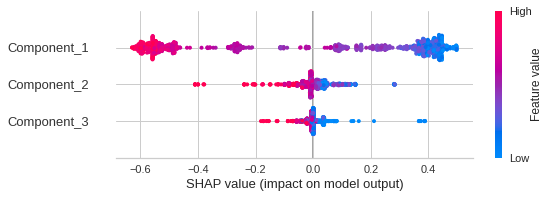

In [81]:
interpret_model(tuned_rf_pca, plot='summary')

In [82]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [83]:
interpret_model(tuned_rf_pca, plot='reason', observation=30)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The blue-colored features increased the predicted value, while the red-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [84]:
interpret_model(tuned_rf_pca, plot='reason')